## Link Prediction

In [61]:

from stellargraph import datasets, StellarGraph
from IPython.display import display, HTML
import networkx as nx
import pandas as pd
import pickle
import os
import glob
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, OPTICS
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


In [2]:
from gensim.models import Word2Vec, KeyedVectors

In [4]:
model_1 = Word2Vec.load("../data/embedding/UAU/walk_length_10_5_per_node_emb_size_16_window_10.bin")
pd.DataFrame({
    "Lady Gaga": model_1.wv.most_similar('Lady Gaga'),
    "Iron Maiden": model_1.wv.most_similar('Iron Maiden'),
    "Linkin Park":  model_1.wv.most_similar('Linkin Park')
})

,Lady Gaga,Iron Maiden,Linkin Park
0,"(Beyoncé, 0.9776496291160583)","(Megadeth, 0.9851434230804443)","(30 Seconds to Mars, 0.9301488399505615)"
1,"(Shakira, 0.9730872511863708)","(Black Sabbath, 0.9768806099891663)","(Green Day, 0.9031417369842529)"
2,"(Britney Spears, 0.9692786335945129)","(Guns N' Roses, 0.9760091304779053)","(Evanescence, 0.8978968858718872)"
3,"(Rihanna, 0.9640059471130371)","(Metallica, 0.9747910499572754)","(1024, 0.8947694301605225)"
4,"(Glee Cast, 0.9636002779006958)","(AC/DC, 0.9526567459106445)","(Avenged Sevenfold, 0.8876761794090271)"
5,"(Christina Aguilera, 0.9635002017021179)","(735, 0.9072819948196411)","(Paramore, 0.8852440118789673)"
6,"(Jennifer Lopez, 0.9595717191696167)","(321, 0.9032052755355835)","(Marilyn Manson, 0.8751785755157471)"
7,"(Katy Perry, 0.9562406539916992)","(720, 0.9022974371910095)","(792, 0.8744171261787415)"
8,"(Kylie Minogue, 0.9507521986961365)","(313, 0.9017204642295837)","(1483, 0.8715929985046387)"
9,"(Ashley Tisdale, 0.949891984462738)","(26, 0.9010456800460815)","(1028, 0.861457109451294)"


In [6]:
model_2 = Word2Vec.load("../data/embedding/UAU/walk_length_10_10_per_node_emb_size_64_window_10.bin")
pd.DataFrame({
    "Lady Gaga": model_2.wv.most_similar('Lady Gaga'),
    "Iron Maiden": model_2.wv.most_similar('Iron Maiden'),
    "Linkin Park":  model_2.wv.most_similar('Linkin Park')
})

,Lady Gaga,Iron Maiden,Linkin Park
0,"(Katy Perry, 0.8911914825439453)","(Black Sabbath, 0.8821600675582886)","(30 Seconds to Mars, 0.7392579913139343)"
1,"(Nicole Scherzinger, 0.8788952827453613)","(595, 0.8793859481811523)","(Slipknot, 0.7384852170944214)"
2,"(Jennifer Lopez, 0.8661878108978271)","(324, 0.8771570324897766)","(1176, 0.7376110553741455)"
3,"(Britney Spears, 0.8627020716667175)","(Megadeth, 0.8710929155349731)","(763, 0.7374407052993774)"
4,"(Beyoncé, 0.862616777420044)","(715, 0.8524216413497925)","(1287, 0.7266164422035217)"
5,"(Rihanna, 0.8607027530670166)","(1860, 0.8521568775177002)","(433, 0.7245829105377197)"
6,"(Shakira, 0.8599144816398621)","(Metallica, 0.8502340316772461)","(347, 0.7236245274543762)"
7,"(225, 0.8575061559677124)","(295, 0.8488166332244873)","(1157, 0.7227452993392944)"
8,"(747, 0.8532507419586182)","(107, 0.8480063676834106)","(1670, 0.7212563753128052)"
9,"(76, 0.8520799279212952)","(51, 0.8477541208267212)","(583, 0.720515251159668)"


In [121]:
model_3 = Word2Vec.load("../data/embedding/UAU/walk_length_10_5_per_node_emb_size_16_window_3.bin")
pd.DataFrame({
    "Lady Gaga": model_3.wv.most_similar('Lady Gaga'),
    "Iron Maiden": model_3.wv.most_similar('Iron Maiden'),
    "Linkin Park":  model_3.wv.most_similar('Linkin Park')
})

,Lady Gaga,Iron Maiden,Linkin Park
0,"(Rihanna, 0.984081506729126)","(Megadeth, 0.992672860622406)","(Green Day, 0.9547324180603027)"
1,"(Glee Cast, 0.983659029006958)","(AC/DC, 0.9880683422088623)","(My Chemical Romance, 0.9518876075744629)"
2,"(Kylie Minogue, 0.9826754331588745)","(Metallica, 0.9859689474105835)","(30 Seconds to Mars, 0.9501136541366577)"
3,"(Beyoncé, 0.9824298620223999)","(Black Sabbath, 0.9857780337333679)","(Nickelback, 0.9354861974716187)"
4,"(Britney Spears, 0.9807188510894775)","(Guns N' Roses, 0.9856671094894409)","(Paramore, 0.9305233955383301)"
5,"(Shakira, 0.9774234890937805)","(Rammstein, 0.9033623933792114)","(Evanescence, 0.919021725654602)"
6,"(Nelly Furtado, 0.974213719367981)","(Queen, 0.9012195467948914)","(Fall Out Boy, 0.9082044363021851)"
7,"(Alicia Keys, 0.9726117253303528)","(735, 0.9001457095146179)","(Panic! At the Disco, 0.9058433771133423)"
8,"(David Guetta, 0.9713722467422485)","(Led Zeppelin, 0.899419367313385)","(Marilyn Manson, 0.905488133430481)"
9,"(Christina Aguilera, 0.9711875915527344)","(827, 0.8969940543174744)","(Avenged Sevenfold, 0.8983943462371826)"


## Clustering

In [122]:
top_artists = pd.read_csv('../data/intermediate/top_artists.csv')
top_artists.head(5)

,artistID,artist_name
0,51,Duran Duran
1,55,Kylie Minogue
2,56,Daft Punk
3,59,New Order
4,65,Coldplay


In [123]:
top_artists['embeddings'] = top_artists['artist_name'].apply(lambda x: model_3.wv[x])

In [11]:
top_artists

,artistID,artist_name,embeddings
0,51,Duran Duran,"[0.041633822, -0.1375264, 0.105136245, -0.1052..."
1,55,Kylie Minogue,"[-0.1617989, -5.4046628e-05, 0.37724888, 0.094..."
2,56,Daft Punk,"[-0.0870124, -0.23242618, -0.057465684, -0.022..."
3,59,New Order,"[0.08465322, -0.17573477, 0.019961316, -0.1600..."
4,65,Coldplay,"[-0.05341902, -0.11450069, -0.02314895, 0.0932..."
...,...,...,...
120,1400,MGMT,"[-0.10075901, -0.22055173, -0.07158147, 0.0341..."
121,1412,Led Zeppelin,"[0.052861735, -0.11763571, 0.12199197, -0.1233..."
122,1513,Ramones,"[-0.03151573, -0.03308013, 0.0022437796, 0.068..."
123,1672,Avenged Sevenfold,"[-0.038501356, -0.037945423, -0.052913904, 0.5..."


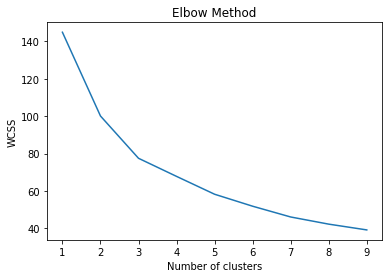

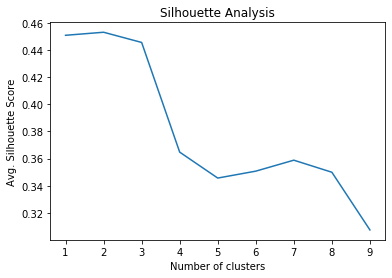

In [124]:
X = np.array(top_artists["embeddings"].values.tolist())
wcss = []
sil_avg = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    wcss.append(kmeans.inertia_)


    sil_avg.append(silhouette_avg)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
plt.plot(range(1, 10), sil_avg)
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Avg. Silhouette Score')
plt.show()

In [27]:

kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X)
top_artists['cluster_labels'] = cluster_labels

top_artists[['artist_name','cluster_labels']].to_csv('./meta.tsv', index = False, sep='\t', header= True)


In [129]:
pd.DataFrame(X).to_csv('./embeddings.tsv', index = False, sep='\t',header = False)

In [139]:
dbscan = DBSCAN(eps=0.88, min_samples=8)
cluster_labels = dbscan.fit_predict(X)
top_artists['cluster_labels'] = cluster_labels


print(top_artists['cluster_labels'].unique())


[-1  0  1  2]


In [140]:
top_artists[['artist_name','cluster_labels']].to_csv('./meta_new.tsv', index = False, sep='\t', header= True)

In [93]:
# optics = OPTICS(eps=0.5, min_samples=6)
# cluster_labels = optics.fit_predict(X)
# top_artists['cluster_labels'] = cluster_labels


# print(top_artists['cluster_labels'].unique())

[-1  0  2  1]


In [64]:
# top_artists[['artist_name','cluster_labels']].to_csv('./meta.tsv', index = False, sep='\t', header= True)